# Entorno de trabajo

Puesta en marcha de Python, OpenCV y jupyter notebooks.

## Instalación

Clonamos [el repositorio](https://github.com/albertoruiz/umucv) con el material de la asignatura:

    git clone https://github.com/albertoruiz/umucv.git
    
En días sucesivos lo iremos actualizando con

    git pull
    
Otra posibilidad es descargar solo [la versión más reciente](https://github.com/albertoruiz/umucv/archive/master.zip):

    wget https://github.com/albertoruiz/umucv/archive/master.zip
    unzip master.zip

### LINUX

Descargamos [miniconda](https://conda.io/miniconda.html) para nuestro sistema con python 3 y lo instalamos.

    bash Miniconda3-latest-Linux-x86_64.sh

Nos preguntará si queremos inicializar la instalación (sí) y la forma de configurarlo para que los terminales no arranquen automáticamente dentro del entorno base.

Una vez instalado hay que cerrar el terminal y abrir otro. Comprobamos que está bien instalado:

    conda activate base

    (base) usuario @ maquina> python

    Python 3.7

Creamos un [entorno de conda](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) con todo lo necesario. Hay dos formas 

Hay varias formas de hacer esto.

1) La más sencilla es descargarnos una versión completa consistente que incluye todos los paquetes necesarios:

    wget https://robot.inf.um.es/material/va/via-local.zip
    
    unzip via-local.zip
    
    cd via-local

    conda create --name via --file visionreqlocal.txt
    
    conda activate via
    
    bash install-pip.sh

Si todo ha ido bien puedes borrar el archivo `via-local.zip` y el directorio `via-local` descomprimido.

Debe funcionar todo sin mayores problemas, pero tiene versiones de los paquetes que no son recientes y es más difícil actualizarla.

2) Una opción mejor es compilar OpenCV. Requiere más tiempo pero es recomendable para tener un entorno más completo y actualizado.

    wget https://robot.inf.um.es/material/va/opencv.tar.gz
    
    unzip opencv.zip

Hace falta instalar algunos paquetes con apt-get. Se hace con un script incluido en el tgz:

    cd opencv
    
    bash packages

Creamos el entorno:

    conda create --name viacv
    
    conda activate viacv
    
    conda install numpy
    
Lanzamos el script de configuración incluido en el tgz: 
    
    cd build
    
    bash opencvconfig

Revisamos la salida para ver si están las opciones deseadas: en la opción Video I/O debe salir YES en FFMPEG y en v4l/v4l2. (Para compilarlo con CUDA consulta al profesor).

    make -j4
    
    make install
    
Comprobamos que se ha instalado correctamente:

    cd

    python
    
    import cv2
    
    cv2.__version__
    
Y completamos la instalación con

    pip install pyqtgraph pyqt5 pyopengl
    pip install dlib
    pip install http://robot.inf.um.es/material/umucv.tar.gz
    
    pip install matplotlib

Finalmente podemos añadir al final de nuestro `.bashrc` una orden `conda activate via` para que automáticamente los terminales que abramos estén en el entorno deseado.

3) Descargamos un miniconda especial

Importante: dentro de un usuario alumno (en /home/alumno, para que funcione también en el lab)

    wget http://robot.inf.um.es/material/va/mcvia.tar.gz

    unzip mcvia.tar.gz

(Si queremos añadir paquetes lo hacemos como alumno)

Añadimos en .bashrc de nuestro usuario:

    export PATH=/home/alumno/mcvia/envs/via/bin:$PATH

3) Una imagen docker (en construcción).

### WINDOWS

Instalamos [anaconda completo](https://www.anaconda.com/distribution/#download-section).

En anaconda prompt ejecutamos

    python -m pip install opencv-python
    
    python -m pip install http://robot.inf.um.es/material/umucv.tar.gz

Otra posibilidad es utilizar el Subsistema Linux de Windows (WSL), como se explica en [este notebook](WSL.ipynb) realizado por vuestro compañero Vladyslav Grechyshkin.

### MAC

Las instrucciones de instalación se explican en [este notebook](MAC.ipynb) realizado por vuestro compañero Eduardo Salmerón Castaño.

## Prueba rápida

En primer lugar importamos las bibliotecas necesarias.

In [1]:
%matplotlib inline

import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt

from skimage import io

Para importar una imagen podríamos usar `imread` de opencv. El problema es que intercambia los canales R y B:

In [2]:
img = cv.imread('../images/coins.png')
print(type(img))
print(img.shape)
#print(img)

<class 'numpy.ndarray'>
(600, 800, 3)


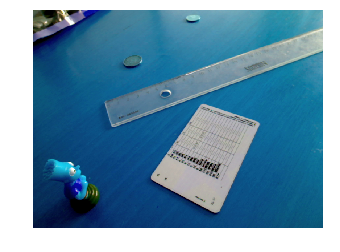

In [3]:
plt.imshow(img)
plt.axis('off');

Para arreglarlo usamos la función que convierte espacios de color.

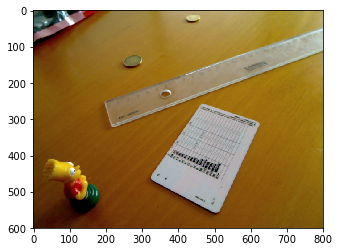

In [4]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB));

Podemos intercambiar los canales aprovechando las posibilidades de indexado de arrays de numpy:

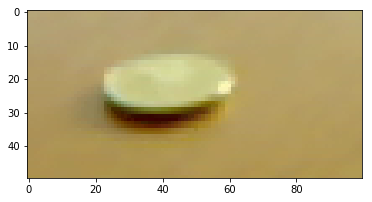

In [5]:
plt.imshow(img[:50,400:500,[2,1,0]]);

Pero es más sencillo usar `imread` de skimage, que además puede leer de url remotas.

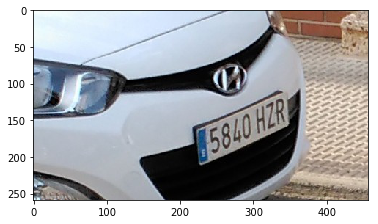

In [6]:
path = "http://robot.inf.um.es/material/va/images/"

view = io.imread(path+"plate.jpg")
plt.imshow(view);

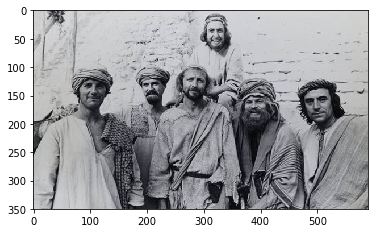

In [7]:
plt.imshow(io.imread("../images/monty-python1.jpg"));

## Ejemplos de código

En un terminal:

    cd path/to/umucv/code
    
    ./stream.py --dev=../images/rot4.mjpg
    
Si tienes una webcam conectada:

    ./surface.py
